San Vu Ngoc - [IRMAR](https://irmar.univ-rennes1.fr/)
___

### Initialisations

In [8]:
%matplotlib inline
# inline can be replaced by notebook to get interactive plots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set figures display bigger

## Tracé de "i divise j"

i =ligne,  j = colonne

In [9]:
n=100
T = np.zeros((n,n))
for i in range(1, n-1):
        for j in range(1, n-1):
            if j % i == 0:
                T[i,j] = 0
            else:
                T[i,j] = 1      

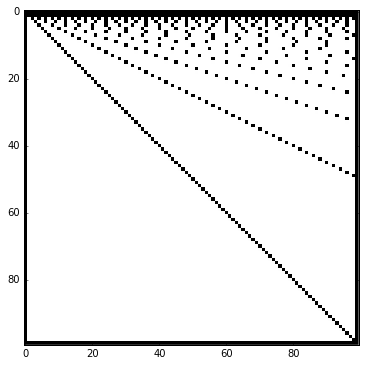

In [10]:
plt.imshow(T, interpolation='none', cmap=cm.gray)
# choix de la colormap: https://matplotlib.org/users/colormaps.html
# choix de l'interpolation: https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

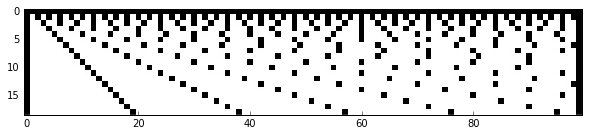

In [11]:
Top = T[1:20,::]
plt.imshow(Top, interpolation='none', cmap=cm.gray)

# Division euclidienne

## Version itérative naïve, comme la "preuve graphique" du cours:

In [12]:
def division (a,b):
    q = 0
    m = 0
    while (m <= a):
      m = m + b
      q = q + 1
    return (q-1, a - m + b)
    

In [13]:
division (2018,123)

(16, 50)

In [14]:
123*16 + 50

2018

Attention avec les nombres négatifs ça ne marche pas du tout:

In [15]:
division (-2018,123)

(-1, -1895)

**Exercice:** adapter la fonction pour admettre a négatif.

### Version un peu plus élégante avec l'_invariant de boucle_ $a = qb + r$

In [16]:
def division2 (a,b):
    q,r = 0,a
    while r >= b:
        r = r - b
        q = q + 1
    return (q,r)

In [17]:
division2 (2018,123)

(16, 50)

## Version récursive:

In [18]:
def divisionR (a,b):
    if a < b:
        return (0, a)
    else:
        q,r = divisionR (a-b, b)
        return (q+1, r)

In [19]:
divisionR (2018,123)

(16, 50)

## Complexité

Dans ces 3 algorithmes, la complexité (ici, le nombre d'itérations) est a/b+1, donc au pire linéaire en a (pire cas: pour b=1). On peut faire mieux (pour les grands nombres) avec un méthode de type Newton, cf:
https://en.wikipedia.org/wiki/Division_algorithm#Newton%E2%80%93Raphson_division


## En pratique
dans tous les langages de programmation, la division euclidienne est déjà implémentée. 

### En Python:  `(q,r) = (a/b, a%b)`

In [20]:
2018/123

16

In [21]:
2018%123

50

Le résultat est correct pour les nombres $a$ négatifs. Donc **attention**: -(a%b) n'est pas égal à (-a)%b !

In [22]:
(-2018)%123

73

In [23]:
-(2018%123)

-50